In [1]:
import gzip
from collections import defaultdict
import numpy as np
import random
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
def readGz(f):
  for l in gzip.open(f):
    yield eval(l)
    
print "Reading data..."
data = list(readGz('train.json.gz'))
print "Done"

Reading data...
Done


In [10]:
train = data[:100000]
valid = data[100000:]

user_item = defaultdict(set)
user = set()
item = set()
for d in train:
    user.add(d['reviewerID'])
    item.add(d['itemID'])
    user_item[d['reviewerID']].add(d['itemID'])

In [12]:
non_user_item = defaultdict(set)
count = 0
while count < 100000:
    u = random.choice(tuple(user))
    i = random.choice(tuple(item))
    if i not in user_item[u]:
        non_user_item[u].add(i)
        count += 1
        if count % 10000 == 0:
            print str(count)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000


In [19]:
businessCount = defaultdict(int)
totalPurchases = 0

for l in readGz("train.json.gz"):
  user,business = l['reviewerID'],l['itemID']
  businessCount[business] += 1
  totalPurchases += 1

mostPopular = [(businessCount[x], x) for x in businessCount]
mostPopular.sort()
mostPopular.reverse()

return1 = set()
count = 0
for ic, i in mostPopular:
  count += ic
  return1.add(i)
  if count > totalPurchases/2: break

In [20]:
new_valid = []
for u in non_user_item:
    for i in non_user_item[u]:
        new_valid.append((u,i))
for d in valid:
    new_valid.append((d['reviewerID'],d['itemID']))
    
y_valid = []
for i in range(100000):
    y_valid.append(0)
for i in range(100000):
    y_valid.append(1)

correct = 0;
for i in range(200000):
    d = new_valid[i]
    y = y_valid[i]
    if d[1] in return1 and y == 1:
        correct += 1
    elif d[1] not in return1 and y == 0:
        correct += 1
        
print "acc : " + str(correct * 1.0 / 200000)

acc : 0.64753


In [21]:
def predict(threshold):
    return1 = set()
    count = 0
    for ic, i in mostPopular:
        count += ic
        return1.add(i)
        if count > totalPurchases * threshold: break
    correct = 0;
    for i in range(200000):
        d = new_valid[i]
        y = y_valid[i]
        if d[1] in return1 and y == 1:
            correct += 1
        elif d[1] not in return1 and y == 0:
            correct += 1
    return correct * 1.0 / 200000

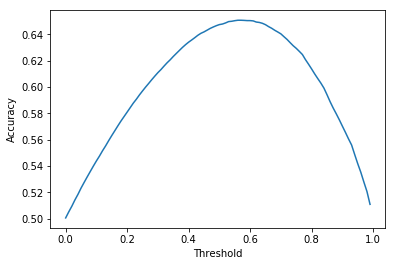

In [22]:
acc = []
for i in range(100):
    acc.append(predict(i / 100.0))
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.plot(np.array(range(len(acc))) / 100., acc)
plt.show()

In [23]:
print "Maximum accuracy:" , max(acc)
print "Threshold for max:", acc.index(max(acc))

Maximum accuracy: 0.650835
Threshold for max: 57


In [43]:
user_category = defaultdict(list)
item_category = defaultdict(list)
for d in train:
    u = d['reviewerID']
    i = d['itemID']
    for c in d['categories']:
        for cc in c:
            user_category[u].append(cc)
            item_category[i].append(cc)
        
def pre_by_cate(u,i):
    count = 0
    for c in item_category[i]:
        if c in user_category[u]:
            count += 1
    if count >= 5:
        return 1
    return 0

In [44]:
return1 = set()
count = 0
for ic, i in mostPopular:
    count += ic
    return1.add(i)
    if count > totalPurchases * 0.57: break
def pre_max(i):     
    if i in return1:
        return 1
    else:
        return 0

In [45]:
predictions = open("/Users/nan/Desktop/pairs_Purchase.txt", 'w')
for l in open("pairs_Purchase.txt"):
    if l.startswith("reviewerID"):
        #header
        predictions.write(l)
        continue
    u,i = l.strip().split('-')
    res = pre_by_cate(u,i)
    if res == 0:
        res = pre_max(i)
    predictions.write(u + '-' + i + ',' + str(res) + '\n')
predictions.close()

In [39]:
np.mean([len(d) for d in user_category] )

10.0

In [63]:
data[7]

{'categories': [['Clothing, Shoes & Jewelry',
   'Women',
   'Clothing',
   'Active',
   'Athletic Socks']],
 'categoryID': 0,
 'helpful': {'nHelpful': 0, 'outOf': 0},
 'itemID': 'I740935639',
 'price': 16.55,
 'rating': 5.0,
 'reviewHash': 'R733487561',
 'reviewText': 'I have really enjoyed the Heat Holders Thermal Socks as I tend to get cold feet in the winter months...every winter without fail...I liked them so much I bought a pair for my husband who has a similar problem and he likes them too...It is not fun getting older but the socks help!!',
 'reviewTime': '03 30, 2014',
 'reviewerID': 'U749984810',
 'summary': 'Great for Cold Feet....',
 'unixReviewTime': 1396137600}

In [66]:
data[888]

{'categories': [['Clothing, Shoes & Jewelry', 'S', 'Speedo'],
  ['Clothing, Shoes & Jewelry', 'Men', 'Clothing', 'Swim', 'Trunks']],
 'categoryID': 1,
 'helpful': {'nHelpful': 0, 'outOf': 0},
 'itemID': 'I900017777',
 'rating': 5.0,
 'reviewHash': 'R546841885',
 'reviewText': 'I purchased these for a beach vacation and they are great. They look great and the material dries really quickly when you come out of the pool. Also the color does not fade. The only thing I will say is that I am a big guy and the XXL is more like 3XL, but it has a great elastic and pull cord so no worries about it coming off in the pool :) I have since bought another in XL.',
 'reviewTime': '06 7, 2013',
 'reviewerID': 'U354249265',
 'summary': 'These are great shorts!!',
 'unixReviewTime': 1370563200}